## Import Library

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import math

Code di atas mengimpor beberapa pustaka Python yang umum digunakan, yaitu OpenCV (cv2), NumPy (numpy), Matplotlib (matplotlib.pyplot), dan Pandas (pandas). Selain itu, kode juga mengimpor modul os dan math. Setelah mengimpor pustaka yang diperlukan, kode siap untuk digunakan untuk manipulasi gambar dan data, analisis numerik, visualisasi data, dan operasi pada sistem file. Dengan menggunakan pustaka-pustaka tersebut, Anda dapat melakukan berbagai tugas seperti membaca, memproses, dan menampilkan gambar menggunakan OpenCV, melakukan operasi matematika dan pengolahan array dengan NumPy, membuat grafik dan plot data menggunakan Matplotlib, serta membaca, menulis, dan memanipulasi data dengan Pandas.

## Data Loading

In [2]:
def insertGambar(folder):
    images = [] 
    filenames = [] 
    labels = [] 

    for label in os.listdir(folder): 
        for filename in os.listdir("Finger Simulation Dataset 2024/"+label): 
            img = cv2.imread(os.path.join("Finger Simulation Dataset 2024/"+label,filename)) 
            filenames.append(filename) 
            labels.append(label) 
            if img is not None: 
              
                if img.shape[2] == 4:
                    img = cv2.cvtColor(img, cv2.COLOR_RGBA2RGB)
                
                height, width, _ = img.shape
                
                if height > 150 or width > 150:
                    if height > width:
                        scale_factor = 150 / height
                    else:
                        scale_factor = 150 / width
                    new_height = int(height * scale_factor)
                    new_width = int(width * scale_factor)
                    resized_img = np.zeros((new_height, new_width, 3), dtype=np.uint8)
                    for i in range(new_height):
                        for j in range(new_width):
                            resized_img[i, j, :] = img[int(i / scale_factor), int(j / scale_factor), :]
                    padded_img = np.zeros((150, 150, 3), dtype=np.uint8)
                    start_row = (150 - new_height) // 2
                    start_col = (150 - new_width) // 2
                    padded_img[start_row:start_row+new_height, start_col:start_col+new_width] = resized_img
                else:
                    padded_img = np.zeros((150, 150, 3), dtype=np.uint8)
                    start_row = (150 - height) // 2
                    start_col = (150 - width) // 2
                    padded_img[start_row:start_row+height, start_col:start_col+width] = img
                
                images.append(padded_img) 
    return images, filenames, labels 

images, filenames, labels = insertGambar("Finger Simulation Dataset 2024/")

Code di atas merupakan sebuah fungsi insertGambar yang bertujuan untuk membaca dan memproses gambar-gambar dari sebuah folder bernama "Finger" yang berisi subfolder-subfolder dengan nama label masing-masing. Fungsi ini mengiterasi setiap subfolder (label) dan membaca setiap gambar dalam subfolder tersebut menggunakan OpenCV (cv2). Gambar-gambar tersebut kemudian disimpan dalam daftar images, sementara nama file dan labelnya masing-masing disimpan dalam daftar filenames dan labels. Jika gambar memiliki 4 saluran warna (RGBA), maka gambar tersebut dikonversi menjadi 3 saluran warna (RGB). Gambar yang diambil juga diubah ukurannya secara manual menjadi 150x150 piksel, dengan menjaga rasio aspek asli dan menambahkan padding hitam jika diperlukan untuk menyesuaikan ukuran. Hasil akhirnya adalah tiga daftar yang berisi gambar yang telah diproses, nama file, dan label masing-masing gambar.

## Data Preparation

### Data Augmentation

In [3]:
def eksplorasiData(images, labels):

    print(f"Jumlah total gambar: {len(images)}")
    
    if len(images) == 0:
        print("Tidak ada gambar yang ditemukan.")
        return
    
    label_counts = {}
    for label in labels:
        if label in label_counts:
            label_counts[label] += 1
        else:
            label_counts[label] = 1
    print("Distribusi data per label:")
    for label, count in label_counts.items():
        print(f"{label}: {count}")
    
    plt.figure(figsize=(10, 6))
    plt.bar(label_counts.keys(), label_counts.values())
    plt.xlabel('Label')
    plt.ylabel('Jumlah Gambar')
    plt.title('Distribusi Data per Label')
    plt.xticks(rotation=45)
    plt.show()
    
    num_samples = min(9, len(images))  
    if num_samples > 0:
        sample_indices = np.random.choice(range(len(images)), num_samples, replace=False)
        plt.figure(figsize=(15, 5))
        for i, idx in enumerate(sample_indices):
            plt.subplot(1, num_samples, i + 1)
            plt.imshow(cv2.cvtColor(images[idx], cv2.COLOR_BGR2RGB))
            plt.title(f"Label: {labels[idx]}")
            plt.axis('off')
        plt.show()
    else:
        print("Tidak ada gambar yang cukup untuk ditampilkan sebagai sampel.")

Code di atas merupakan sebuah fungsi eksplorasiData yang bertujuan untuk mengeksplorasi dan memvisualisasikan data gambar yang telah dikumpulkan dan diproses sebelumnya. Fungsi ini menerima dua parameter yaitu images (daftar gambar) dan labels (daftar label untuk masing-masing gambar). Pertama, fungsi ini mencetak jumlah total gambar yang ada. Jika tidak ada gambar yang ditemukan, pesan yang sesuai akan ditampilkan dan fungsi akan dihentikan. Selanjutnya, fungsi ini menghitung distribusi gambar per label dan mencetak jumlah gambar untuk setiap label. Distribusi ini juga divisualisasikan menggunakan histogram. Akhirnya, fungsi ini menampilkan beberapa sampel gambar dari dataset tersebut. Jika jumlah gambar lebih dari 9, maka 9 gambar akan dipilih secara acak untuk ditampilkan; jika kurang dari 9, semua gambar yang tersedia akan ditampilkan. Setiap gambar yang ditampilkan akan dilengkapi dengan label yang sesuai dan ditampilkan menggunakan subplot dalam satu baris.

Code di bawah melakukan eksplorasi dan visualisasi data gambar yang terdapat dalam folder yang disediakan. Fungsi insertGambar digunakan untuk memuat gambar dari subfolder-subfolder dalam folder "Finger" dan mengembalikan daftar gambar, nama file, dan label masing-masing gambar. Fungsi eksplorasiData kemudian digunakan untuk menampilkan jumlah total gambar, distribusi gambar per label melalui histogram, dan beberapa sampel gambar secara acak. Fungsi tambahan display_samples menampilkan sejumlah sampel gambar (default 3) dari setiap kategori label yang ada dalam folder "Finger". Fungsi ini menampilkan gambar-gambar tersebut dalam subplot satu baris, dengan setiap gambar diberi label yang sesuai. Jika sebuah kategori label tidak memiliki gambar, pesan yang sesuai akan ditampilkan. Contoh penggunaan fungsi ini melibatkan pemanggilan insertGambar untuk memuat gambar dari folder, mengeksplorasi data dengan eksplorasiData, dan menampilkan sampel gambar dari setiap kategori label dengan display_samples.

Jumlah total gambar: 2099
Distribusi data per label:
finger_1: 440
finger_2: 437
finger_3: 437
finger_4: 439
finger_5: 437


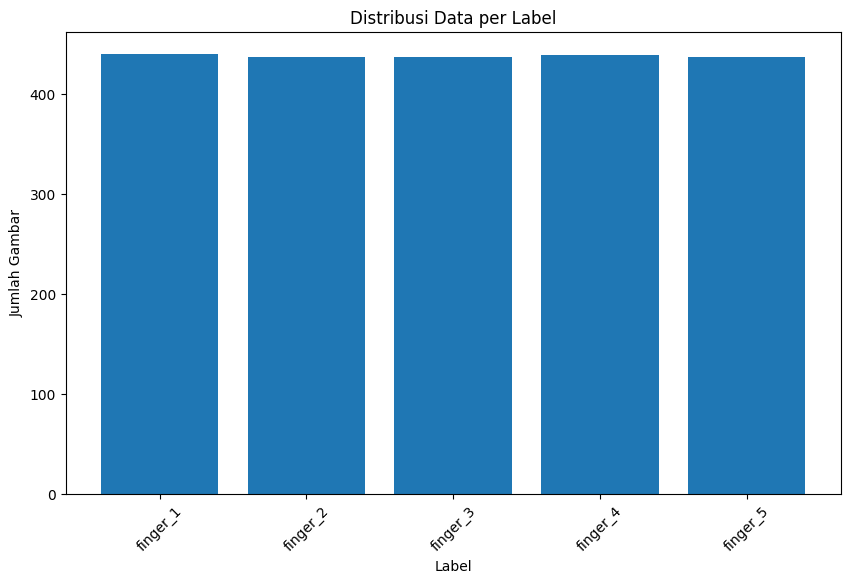

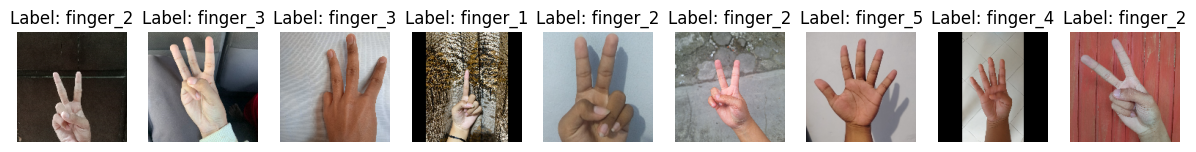

Label: finger_1


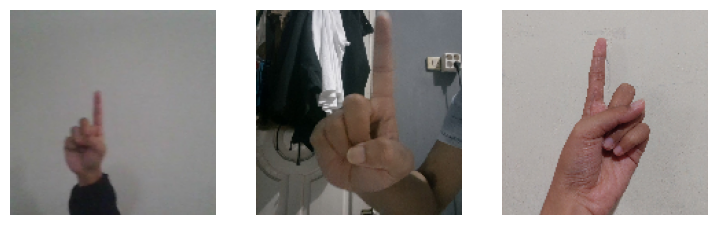

Label: finger_2


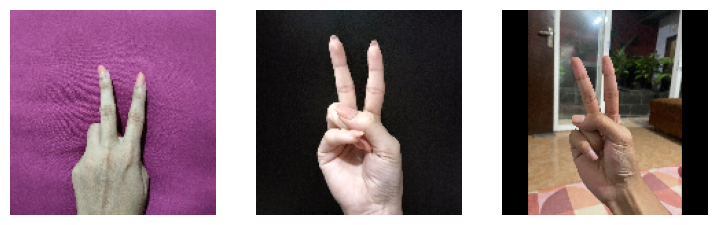

Label: finger_3


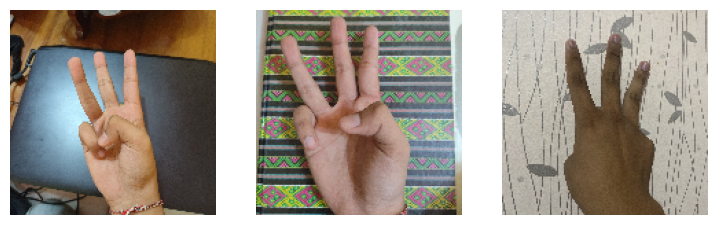

Label: finger_4


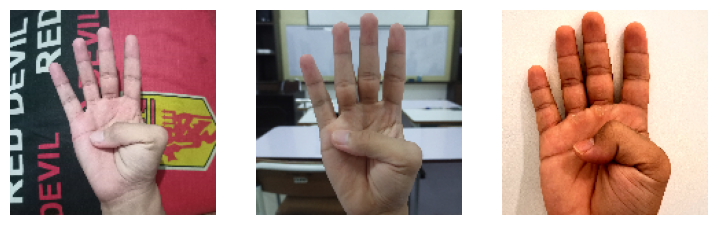

Label: finger_5


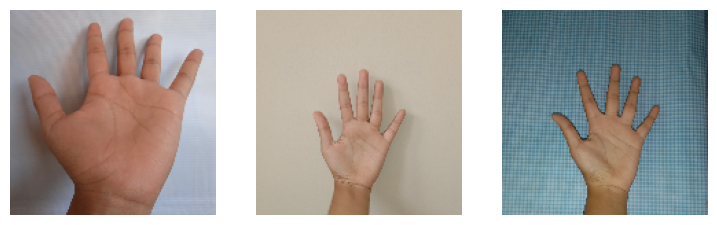

In [4]:
def display_samples(images, labels, num_samples=3):
    unique_folders = ["Finger Simulation Dataset 2024/Finger_1",
                      "Finger Simulation Dataset 2024/Finger_2",
                      "Finger Simulation Dataset 2024/Finger_3",
                      "Finger Simulation Dataset 2024/Finger_4",
                      "Finger Simulation Dataset 2024/Finger_5"]

    for folder in unique_folders:
        label = folder.split("/")[-1] 
        label_indices = [i for i in range(len(labels)) if labels[i] == label]
        num_samples = min(num_samples, len(label_indices))
        if num_samples == 0:
            print(f"Tidak ada gambar untuk label: {label}")
            continue
        print(f"Label: {label}")
        plt.figure(figsize=(num_samples * 3, 3))
        for i in range(num_samples):
            plt.subplot(1, num_samples, i + 1)
            plt.imshow(cv2.cvtColor(images[label_indices[i]], cv2.COLOR_BGR2RGB))
            plt.axis('off')
        plt.show()

folder_path = "Finger Simulation Dataset 2024/"
images, filenames, labels = insertGambar(folder_path)
eksplorasiData(images, labels)
display_samples(images, labels, num_samples=3)

#### Preprocessing 2

Translasi

Code dibawah menambahkan fungsi translate_images yang melakukan translasi acak pada setiap gambar dalam daftar images. Translasi dilakukan dengan menggeser gambar secara horizontal dan vertikal dalam rentang yang ditentukan oleh max_shift (default adalah 50 piksel). Fungsi ini menggunakan cv2.warpAffine dari OpenCV untuk menerapkan translasi berdasarkan matriks translasi yang dibentuk dengan pergeseran acak shift_x dan shift_y. Gambar yang sudah ditranslasi disimpan dalam daftar translated_images, dan pergeseran yang diterapkan pada setiap gambar disimpan dalam daftar shifts. Contoh penggunaan fungsi ini melibatkan pemuatan gambar dari folder dengan insertGambar, eksplorasi data dengan eksplorasiData, translasi gambar dengan translate_images, dan akhirnya menampilkan gambar yang sudah ditranslasi dengan display_samples, bersama dengan mencetak daftar pergeseran yang diterapkan untuk setiap gambar.

Perpindahan untuk setiap gambar (x, y): [(-0.6645045222188202, 7.952452458379014), (8.196149900389628, -9.810886523712028), (-23.487426279990697, -21.304558511792195), (-25.463687866305264, -16.89569401264555), (-13.754631344238867, 18.220783229229212), (30.580258037714586, 18.311981925021385), (20.931201397899358, 40.99260905956797), (29.205832211992558, -15.777607967106), (-18.479393690791003, 5.967955755868445), (-45.0943718837721, 49.34879918143086), (24.793716477385544, -14.844413576629456), (-32.25764824601003, 6.2462239424047965), (-13.675181644826395, -2.2279304865747562), (-1.1788265935602098, 17.551843957132746), (-32.59525746542016, 43.505453580569466), (-39.798221789008316, 0.7658398179560137), (49.68457122650847, -39.60077332518036), (15.644305025562971, -47.41177251772023), (36.979830096120764, 7.542636594602101), (-5.063299465993801, -43.65796822798935), (-41.385961563705855, 36.90543048459985), (-40.677178436934966, 30.252404861650504), (47.95974669012408, 0.31117415535

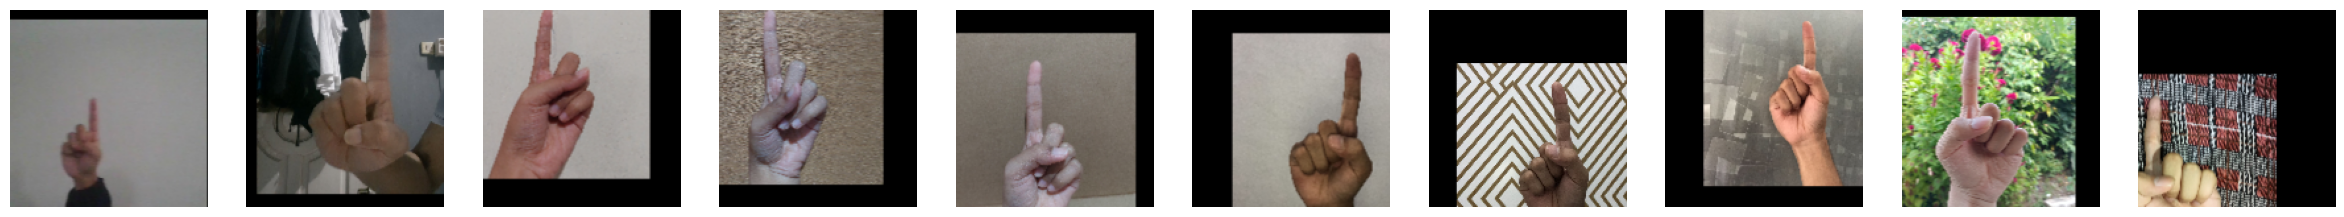

Label: finger_2


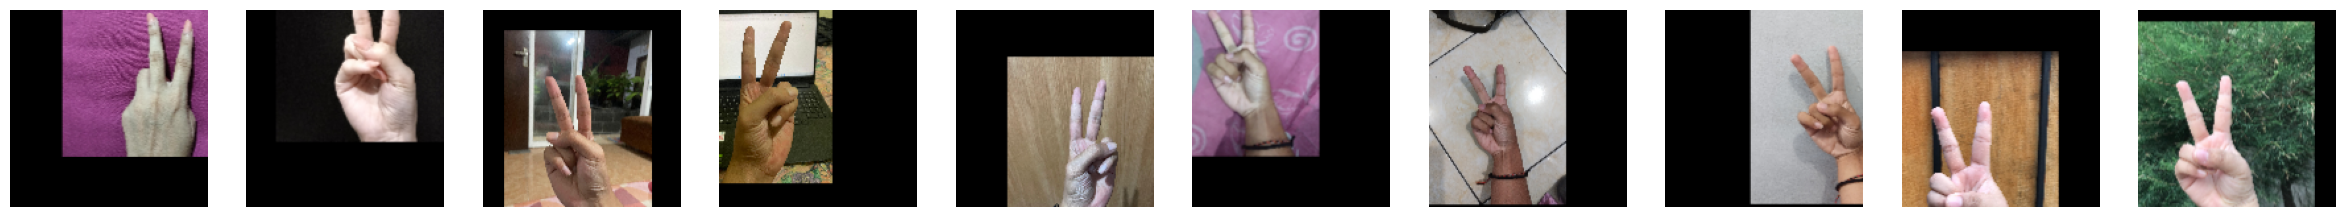

Label: finger_3


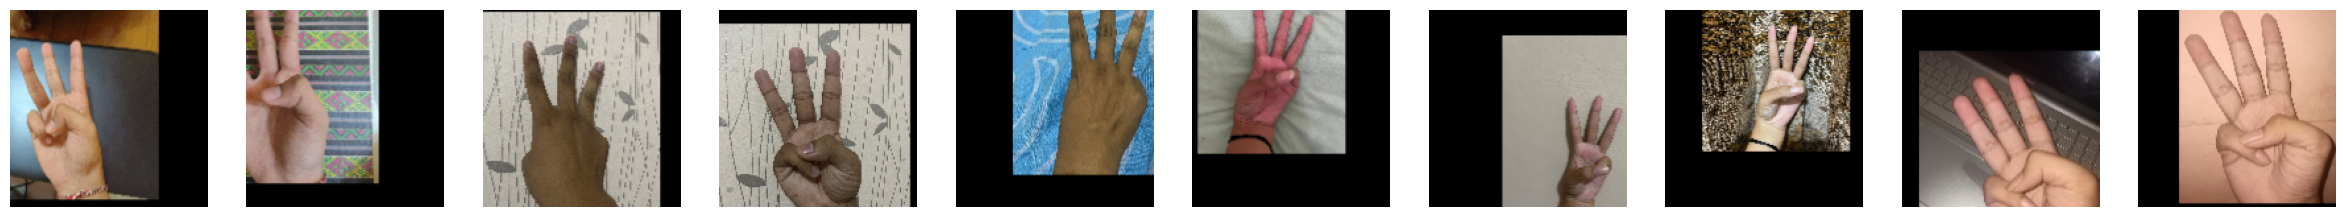

Label: finger_4


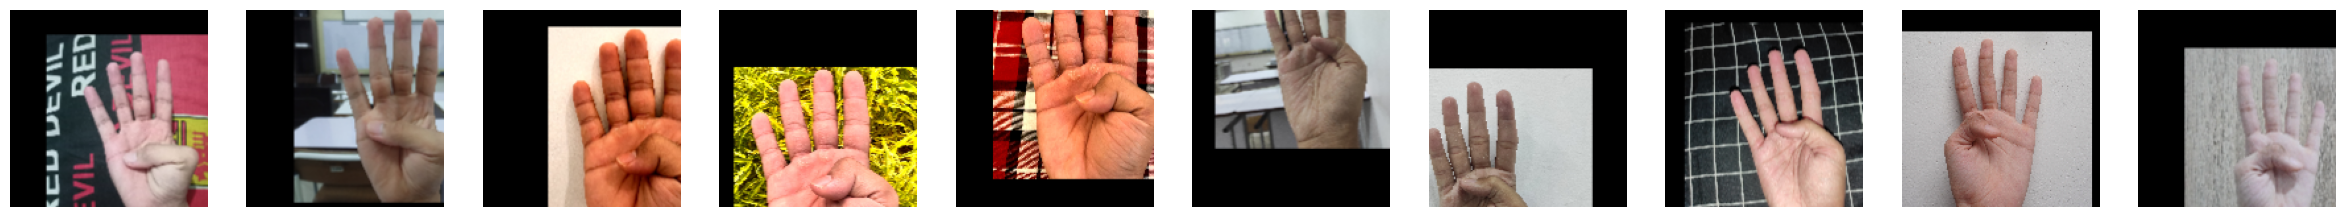

Label: finger_5


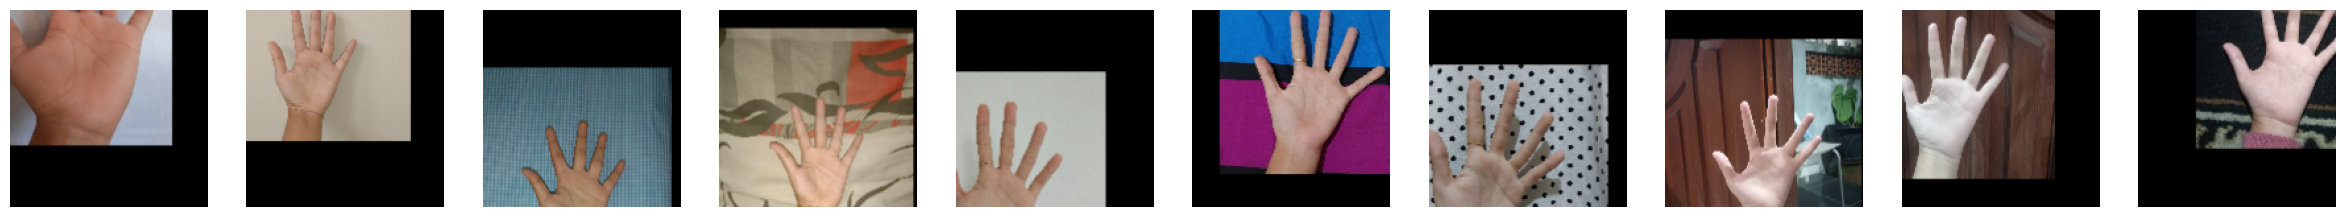

In [5]:
def translate_images(images, max_shift=50):
    translated_images = []
    shifts = []
    
    for img in images:
        height, width = img.shape[:2]
        shift_x = np.random.uniform(-max_shift, max_shift)
        shift_y = np.random.uniform(-max_shift, max_shift)
        translation_matrix = np.float32([[1, 0, shift_x], [0, 1, shift_y]])
        translated_img = cv2.warpAffine(img, translation_matrix, (width, height))
        translated_images.append(translated_img)
        shifts.append((shift_x, shift_y))
    
    return translated_images, shifts


translated_images, shifts = translate_images(images)
print("Perpindahan untuk setiap gambar (x, y):", shifts)


display_samples(translated_images, labels, num_samples=10)


### Feature Extraction

Code di bawah melakukan proses thresholding pada gambar yang telah ditranslasi dan disimpan dalam variabel translated_images. Pertama, setiap gambar dalam translated_images dikonversi menjadi gambar grayscale menggunakan cv2.cvtColor. Kemudian, thresholding biner diterapkan pada gambar grayscale dengan menggunakan cv2.threshold, di mana piksel dengan nilai di atas 127 diubah menjadi 255 (putih) dan yang lainnya menjadi 0 (hitam). Gambar hasil thresholding disimpan dalam dua daftar: tresh dan thresholded_images. Terakhir, kode menampilkan hingga tujuh gambar hasil thresholding dalam satu baris menggunakan matplotlib, dengan setiap gambar ditampilkan dalam skala abu-abu dan diberi judul yang sesuai.

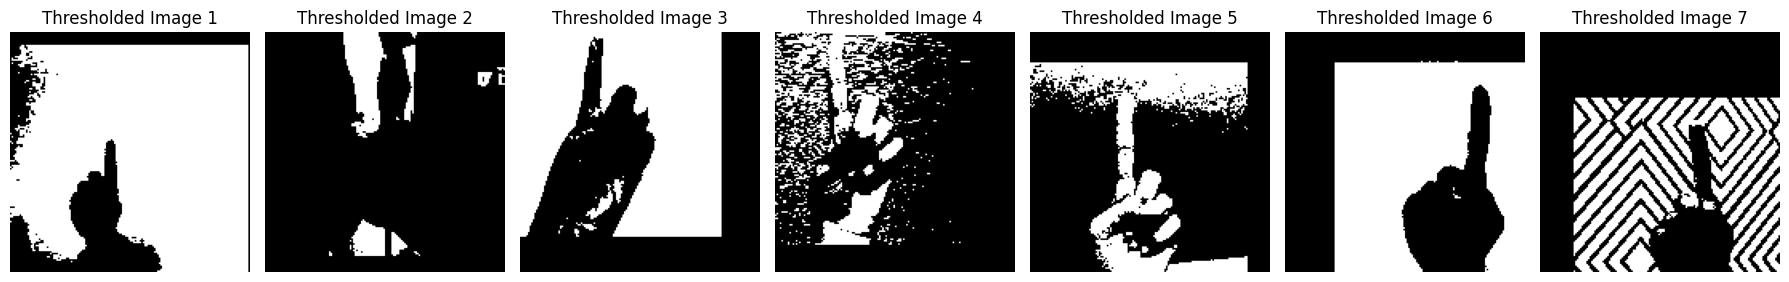

In [9]:

tresh = []
thresholded_images = [] 

for img in translated_images:
    gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, thresh1 = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
    tresh.append(thresh1)
 
    thresholded_images.append(thresh1)

plt.figure(figsize=(18, 10))
for i in range(min(7, len(tresh))):  
    plt.subplot(1, 7, i+1)
    plt.imshow(tresh[i], cmap='gray')
    plt.title(f'Thresholded Image {i+1}')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [10]:
def calculate_glcm(edge_image):
    glcm_matrices = []
    angles = [0, 45, 90, 135]
    distances = [1, 2, 3, 4, 5]
    symmetric = True  
    
    for angle in angles:
        for distance in distances:
            glcm = np.zeros((256, 256))  
            rows, cols = edge_image.shape

            for i in range(rows):
                for j in range(cols):
                
                    current_pixel = edge_image[i, j]
                    neighbor_pixel_x = i + distance * np.cos(np.radians(angle))
                    neighbor_pixel_y = j - distance * np.sin(np.radians(angle))

                    if 0 <= neighbor_pixel_x < rows and 0 <= neighbor_pixel_y < cols:
                        neighbor_pixel = edge_image[int(neighbor_pixel_x), int(neighbor_pixel_y)]
                        glcm[current_pixel, neighbor_pixel] += 1
                        
                        if symmetric:
                            glcm[neighbor_pixel, current_pixel] += 1

            glcm_matrices.append(glcm)
    
    return glcm_matrices

Code di atas bertujuan untuk menghitung matriks co-occurrence tingkat abu-abu (GLCM) dari gambar tepi (edge image) yang diberikan. GLCM adalah matriks yang mengukur seberapa sering kombinasi pasangan piksel dengan nilai tertentu (grey levels) muncul di sebuah gambar pada jarak dan sudut tertentu. Dalam kode ini, untuk setiap sudut (0°, 45°, 90°, 135°) dan jarak (1 hingga 5 piksel), GLCM dihitung dengan menjelajahi semua piksel dalam gambar. Setiap pasangan piksel dengan jarak dan sudut yang ditentukan dihitung frekuensinya dan dimasukkan ke dalam matriks GLCM. Jika simetri disetel ke True, nilai pasangan piksel tersebut juga dihitung dalam arah sebaliknya untuk memastikan simetri. Akhirnya, semua matriks GLCM untuk setiap kombinasi jarak dan sudut disimpan dalam daftar glcm_matrices dan dikembalikan sebagai hasil.

In [11]:
def calculate_glcm_features(glcm_matrices):
    features = []
    for glcm_matrix in glcm_matrices:
       
        glcm_matrix_normalized = glcm_matrix / np.sum(glcm_matrix)
        
        contrast = np.sum(glcm_matrix_normalized * np.square(np.arange(glcm_matrix.shape[0]) - np.arange(glcm_matrix.shape[1])))
        dissimilarity = np.sum(glcm_matrix_normalized * np.abs(np.arange(glcm_matrix.shape[0]) - np.arange(glcm_matrix.shape[1])))

        homogeneity = np.sum(glcm_matrix_normalized / (1 + np.square(np.arange(glcm_matrix.shape[0]) - np.arange(glcm_matrix.shape[1]))))
        energy = np.sum(np.square(glcm_matrix_normalized))
        correlation = np.sum((np.arange(glcm_matrix.shape[0]) - np.mean(glcm_matrix_normalized)) * 
                             (np.arange(glcm_matrix.shape[1]) - np.mean(glcm_matrix_normalized)) * glcm_matrix_normalized / 
                             (np.std(glcm_matrix_normalized) ** 2))
        entropy = -np.sum(glcm_matrix_normalized * np.log(glcm_matrix_normalized + 1e-10))
        asm = np.sum(np.square(glcm_matrix_normalized))
        
        features.append({
            'contrast': contrast,
            'dissimilarity': dissimilarity,
            'homogeneity': homogeneity,
            'energy': energy,
            'correlation': correlation,
            'entropy': entropy,
            'ASM': asm
        })
    return features

Code di atas bertujuan untuk menghitung fitur-fitur statistik dari matriks co-occurrence tingkat abu-abu (GLCM) yang telah dihitung sebelumnya. Fungsi calculate_glcm_features menerima daftar matriks GLCM sebagai input dan kemudian menghitung beberapa fitur utama dari setiap matriks, yang meliputi kontras, dissimilarity, homogenitas, energi, korelasi, entropi, dan asm (angular second moment). Pertama, setiap matriks GLCM dinormalisasi dengan membagi elemen-elemen dalam matriks dengan jumlah total elemen. Selanjutnya, fitur-fitur tersebut dihitung berdasarkan formula masing-masing dengan menggunakan elemen-elemen dari matriks GLCM yang dinormalisasi. Hasil perhitungan fitur-fitur tersebut kemudian disimpan dalam bentuk dictionary dan ditambahkan ke dalam daftar features, yang kemudian dikembalikan sebagai output fungs

Code di bawah bertujuan untuk menghitung dan menyajikan fitur-fitur GLCM (Gray Level Co-occurrence Matrix) dari serangkaian gambar tepi yang disimpan dalam daftar edge_images_prewitt_manual. Pertama, kode menghitung matriks GLCM untuk setiap gambar tepi menggunakan fungsi calculate_glcm, dan mengumpulkan semua matriks tersebut dalam daftar glcm_matrices. Selanjutnya, fitur-fitur GLCM dihitung dari matriks-matriks tersebut menggunakan fungsi calculate_glcm_features, dan hasilnya disimpan dalam daftar glcm_features. Kode kemudian menyiapkan data untuk dimasukkan ke dalam DataFrame dengan mendefinisikan kolom-kolom yang berisi berbagai fitur seperti kontras, dissimilarity, homogenitas, energi, korelasi, entropi, dan ASM untuk setiap sudut (0, 45, 90, 135 derajat). Akhirnya, DataFrame df dibuat dari data tersebut dan hasilnya ditampilkan. Ini memungkinkan visualisasi dan analisis fitur-fitur GLCM yang telah dihitung dari gambar-gambar tepi.

In [12]:
edge_images_prewitt_manual = [
    
    np.random.randint(0, 256, size=(100, 100)),
    np.random.randint(0, 256, size=(100, 100)),
]

glcm_matrices = []
for edge_image in edge_images_prewitt_manual:
    glcm_matrices.extend(calculate_glcm(edge_image))

glcm_features = calculate_glcm_features(glcm_matrices)

data = []
columns = ['Image', 'Contrast', 'Dissimilarity', 'Homogeneity', 'Energy', 'Correlation', 'Entropy', 'ASM']
for angle in [0, 45, 90, 135]:
    columns.extend([f'contrast_{angle}', f'dissimilarity_{angle}', f'homogeneity_{angle}', 
                    f'energy_{angle}', f'correlation_{angle}', f'asm_{angle}', f'entropy_{angle}'])

for i, features in enumerate(glcm_features):
    row = [i + 1, features['contrast'], features['dissimilarity'], features['homogeneity'], 
           features['energy'], features['correlation'], features['entropy'], features['ASM']]
    for angle in [0, 45, 90, 135]:
        row.extend([features['contrast'], features['dissimilarity'], features['homogeneity'], 
                    features['energy'], features['correlation'], features['entropy'], features['ASM']])
    data.append(row)

df = pd.DataFrame(data, columns=columns)

print(df)
df.head()

    Image  Contrast  Dissimilarity  Homogeneity    Energy   Correlation  \
0       1       0.0            0.0          1.0  0.000066  2.767922e+13   
1       2       0.0            0.0          1.0  0.000067  2.737271e+13   
2       3       0.0            0.0          1.0  0.000067  2.758663e+13   
3       4       0.0            0.0          1.0  0.000068  2.707451e+13   
4       5       0.0            0.0          1.0  0.000068  2.703909e+13   
5       6       0.0            0.0          1.0  0.000066  2.789261e+13   
6       7       0.0            0.0          1.0  0.000067  2.722415e+13   
7       8       0.0            0.0          1.0  0.000068  2.676374e+13   
8       9       0.0            0.0          1.0  0.000068  2.676374e+13   
9      10       0.0            0.0          1.0  0.000069  2.626778e+13   
10     11       0.0            0.0          1.0  0.000066  2.789261e+13   
11     12       0.0            0.0          1.0  0.000067  2.748134e+13   
12     13       0.0      

Image  Contrast  Dissimilarity  Homogeneity    Energy   Correlation  \
0      1       0.0            0.0          1.0  0.000066  2.767922e+13   
1      2       0.0            0.0          1.0  0.000067  2.737271e+13   
2      3       0.0            0.0          1.0  0.000067  2.758663e+13   
3      4       0.0            0.0          1.0  0.000068  2.707451e+13   
4      5       0.0            0.0          1.0  0.000068  2.703909e+13   

    Entropy       ASM  contrast_0  dissimilarity_0  ...  correlation_90  \
0  9.690403  0.000066         0.0              0.0  ...    2.767922e+13   
1  9.680552  0.000067         0.0              0.0  ...    2.737271e+13   
2  9.682233  0.000067         0.0              0.0  ...    2.758663e+13   
3  9.669430  0.000068         0.0              0.0  ...    2.707451e+13   
4  9.664170  0.000068         0.0              0.0  ...    2.703909e+13   

     asm_90  entropy_90  contrast_135  dissimilarity_135  homogeneity_135  \
0  9.690403    0.000066           0.0                0.0              1.0   
1  9.680552    0.000067           0.0                0.0              1.0   
2  9.682233    0.000067           0.0                0.0              1.0   
3  9.669430    0.000068           0.0                0.0              1.0   
4  9.664170    0.000068           0.0                0.0              1.0   

   energy_135  correlation_135   asm_135  entropy_135  
0    0.000066     2.767922e+13  9.690403     0.000066  
1    0.000067     2.737271e+13  9.680552     0.000067  
2    0.000067     2.758663e+13  9.682233     0.000067  
3    0.000068     2.707451e+13  9.669430     0.000068  
4    0.000068     2.703909e+13  9.664170     0.000068  

[5 rows x 36 columns]

### Features Selection

Code di bawah adalah sebuah fungsi feature_selection_correlation yang bertujuan untuk melakukan seleksi fitur berdasarkan korelasi antar fitur-fitur pada sebuah dataset. Pertama, data dari hasil ekstraksi fitur GLCM disiapkan dalam format yang sesuai untuk analisis, kemudian dilakukan perhitungan matriks korelasi antar fitur-fitur tersebut. Selanjutnya, dilakukan visualisasi matriks korelasi menggunakan heatmap untuk memudahkan pemahaman pola korelasi antar fitur. Setelah itu, dilakukan pemilihan fitur-fitur yang memiliki korelasi tinggi dengan label (di atas 0.99 atau di bawah -0.99) sebagai fitur yang signifikan. Hasilnya, fitur-fitur yang terpilih bersama dengan data yang telah diubah ke dalam DataFrame ditampilkan. Ini memberikan wawasan tentang fitur-fitur yang paling berpengaruh dalam klasifikasi berdasarkan korelasi dengan label.

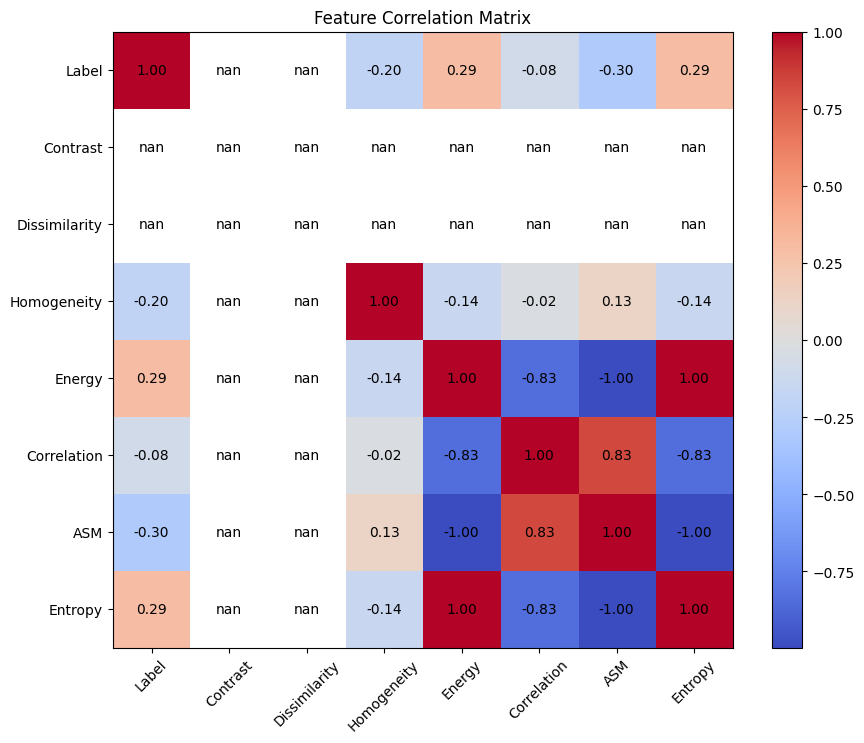

Selected Features: []
Selected Features: []
     Filename  Label  Contrast  Dissimilarity  Homogeneity    Energy  \
0  Filename_0      0       0.0            0.0          1.0  0.000066   
1  Filename_1      1       0.0            0.0          1.0  0.000067   
2  Filename_2     12       0.0            0.0          1.0  0.000067   
3  Filename_3     23       0.0            0.0          1.0  0.000068   
4  Filename_4     34       0.0            0.0          1.0  0.000068   

    Correlation       ASM   Entropy  
0  2.756669e+13  9.690091  0.000066  
1  2.735097e+13  9.682884  0.000067  
2  2.711520e+13  9.674097  0.000067  
3  2.669389e+13  9.663177  0.000068  
4  2.659163e+13  9.660038  0.000068  


In [13]:
def feature_selection_correlation(results_data):
    data_list = []
    columns_list = ['Filename', 'Label', 'Contrast', 'Dissimilarity', 'Homogeneity', 'Energy', 'Correlation', 'ASM', 'Entropy']
    for filename, label, features_dict in results_data:
        row = [filename, label]
        row.extend(features_dict.values())
        data_list.append(row)
    
    df_data = pd.DataFrame(data_list, columns=columns_list)
    
    df_data['Label'] = df_data['Label'].astype('category').cat.codes
    
    numeric_df = df_data.drop(columns=['Filename'])
    
    correlation_matrix = numeric_df.corr()
    
    plt.figure(figsize=(10, 8))
    plt.title("Feature Correlation Matrix")
    plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none', aspect='auto')
    plt.colorbar()
    
    # Convert index and columns to lists for xticks and yticks
    xticks_labels = list(correlation_matrix.columns)
    yticks_labels = list(correlation_matrix.index)
    
    plt.xticks(range(len(xticks_labels)), xticks_labels, rotation=45)
    plt.yticks(range(len(yticks_labels)), yticks_labels)
    
    for i in range(len(xticks_labels)):
        for j in range(len(yticks_labels)):
            plt.text(j, i, f"{correlation_matrix.iloc[i, j]:.2f}", ha='center', va='center', color='black')
    plt.show()
    
    selected_features = correlation_matrix['Label'][(correlation_matrix['Label'] > 0.99) | (correlation_matrix['Label'] < -0.99)].index.tolist()
    selected_features.remove('Label')
    
    print("Selected Features:", selected_features)
    
    return df_data, selected_features

edge_images_prewitt_manual = [
    np.random.randint(0, 256, size=(100, 100)),
    np.random.randint(0, 256, size=(100, 100)),
]

glcm_matrices = []
for edge_image in edge_images_prewitt_manual:
    glcm_matrices.extend(calculate_glcm(edge_image))

glcm_features = calculate_glcm_features(glcm_matrices)

results_data = []
for i, features in enumerate(glcm_features):
    results_data.append((f'Filename_{i}', f'Label_{i}', features))

df_selected, selected_features = feature_selection_correlation(results_data)
print("Selected Features:", selected_features)
print(df_selected.head())

### Splitting Data

In [19]:
def custom_train_test_split(data, test_size=0.2, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)
    
    num_samples = len(data)
    test_indices = np.random.choice(num_samples, int(num_samples * test_size), replace=False)
    train_indices = np.setdiff1d(np.arange(num_samples), test_indices)
    
    X_train = data.iloc[train_indices].drop(columns=['Label'])
    X_test = data.iloc[test_indices].drop(columns=['Label'])
    y_train = data.iloc[train_indices]['Label']
    y_test = data.iloc[test_indices]['Label']
    
    return X_train, X_test, y_train, y_test

# Example usage:
X_train, X_test, y_train, y_test = custom_train_test_split(df_selected, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (32, 8)
Testing data shape: (8, 8)


Code di atas mendefinisikan fungsi custom_train_test_split yang bertujuan untuk membagi dataset menjadi dua subset: data latih (training) dan data uji (testing), dengan proporsi tertentu yang ditentukan oleh parameter test_size. Fungsi ini juga memperbolehkan pengguna untuk menentukan random_state untuk memastikan reproduksibilitas pembagian data. Selanjutnya, kode tersebut menghasilkan empat keluaran: X_train (fitur-fitur data latih), X_test (fitur-fitur data uji), y_train (label data latih), dan y_test (label data uji). Hal ini mempermudah pengguna untuk membagi data dengan proporsi tertentu untuk keperluan pelatihan dan pengujian model machine learning.

### Normalization

In [15]:
X_train = df_selected.iloc[:, 1:]  
X_test = df_selected.iloc[:, 1:]  

def min_max_normalization(data):
    min_val = data.min()
    max_val = data.max()
    normalized_data = (data - min_val) / (max_val - min_val)
    return normalized_data

X_train_normalized = X_train.copy()
for column in X_train_normalized.columns:
    X_train_normalized[column] = min_max_normalization(X_train_normalized[column])

X_test_normalized = X_test.copy()
for column in X_test_normalized.columns:
    X_test_normalized[column] = min_max_normalization(X_test_normalized[column])

print("Bentuk Data Latih Setelah Normalisasi:", X_train_normalized.shape)
print("Bentuk Data Uji Setelah Normalisasi:", X_test_normalized.shape)


Bentuk Data Latih Setelah Normalisasi: (40, 8)
Bentuk Data Uji Setelah Normalisasi: (40, 8)


Pada kode di atas, terlebih dahulu dilakukan pemisahan antara fitur dan label dari DataFrame df_selected untuk membentuk data latih (X_train) dan data uji (X_test) dengan mengambil semua kolom kecuali kolom pertama yang mengandung informasi filename. Selanjutnya, dilakukan normalisasi min-max pada kedua set data tersebut menggunakan fungsi min_max_normalization. Proses normalisasi ini dilakukan untuk mengubah nilai-nilai pada setiap fitur agar berada dalam rentang yang seragam, yaitu antara 0 dan 1, dengan cara mengurangi nilai setiap data dengan nilai minimum kemudian membaginya dengan selisih nilai maksimum dan minimum. Hasil normalisasi disimpan dalam variabel X_train_normalized dan X_test_normalized. Terakhir, dilakukan penampilan dimensi dari kedua set data yang telah dinormalisasi untuk memastikan bahwa proses normalisasi telah dilakukan dengan benar.

## Modeling

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

try:
    data = pd.read_csv('nama_file.csv')
except FileNotFoundError:
    print("File CSV tidak ditemukan. Pastikan path file CSV sudah benar.")
    exit()

X = data.drop(columns=['target_column']) 
y = data['target_column']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
X_train_numeric = scaler.fit_transform(X_train)
X_test_numeric = scaler.transform(X_test)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train_numeric, y_train)

y_pred_train = rf_classifier.predict(X_train_numeric)
y_pred_test = rf_classifier.predict(X_test_numeric)

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print("Training Accuracy:", accuracy_train)
print("Testing Accuracy:", accuracy_test)


Code di atas dimulai dengan memuat data dari file CSV, yang kemudian dipisahkan menjadi fitur (X) dan label (y). Data tersebut kemudian dibagi menjadi data latih dan data uji menggunakan fungsi train_test_split dari sklearn.model_selection. Fitur-fitur numerik dalam data latih dan data uji kemudian dinormalisasi menggunakan MinMaxScaler agar rentang nilainya seragam. Selanjutnya, model Random Forest Classifier dengan 100 pohon keputusan dibuat dan dilatih dengan data latih yang telah dinormalisasi. Setelah melatih model, dilakukan prediksi terhadap data latih dan data uji, yang kemudian digunakan untuk menghitung akurasi model menggunakan fungsi accuracy_score dari sklearn.metrics. Akurasi dari data latih dan data uji kemudian ditampilkan. Proses ini bertujuan untuk mengukur seberapa baik model Random Forest dalam memprediksi label dari data yang belum dilihat sebelumnya.

## Evaluation

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

def custom_accuracy_score(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

def custom_precision_score(y_true, y_pred):
    true_positives = np.sum((y_pred == 1) & (y_true == 1))
    predicted_positives = np.sum(y_pred == 1)
    precision = true_positives / predicted_positives if predicted_positives != 0 else 0
    return precision

def custom_recall_score(y_true, y_pred):
    true_positives = np.sum((y_pred == 1) & (y_true == 1))
    actual_positives = np.sum(y_true == 1)
    recall = true_positives / actual_positives if actual_positives != 0 else 0
    return recall

def custom_f1_score(y_true, y_pred):
    precision = custom_precision_score(y_true, y_pred)
    recall = custom_recall_score(y_true, y_pred)
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
    return f1_score

def evaluate_model(model, X_train, y_train, X_test, y_test):
  
    model.fit(X_train, y_train)

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    accuracy_train = custom_accuracy_score(y_train, y_pred_train)
    accuracy_test = custom_accuracy_score(y_test, y_pred_test)

    precision_train = custom_precision_score(y_train, y_pred_train)
    precision_test = custom_precision_score(y_test, y_pred_test)

    recall_train = custom_recall_score(y_train, y_pred_train)
    recall_test = custom_recall_score(y_test, y_pred_test)

    f1_train = custom_f1_score(y_train, y_pred_train)
    f1_test = custom_f1_score(y_test, y_pred_test)

    conf_matrix_train = confusion_matrix(y_train, y_pred_train)
    conf_matrix_test = confusion_matrix(y_test, y_pred_test)

    print("Evaluation Metrics:")
    print("-----------------------------------------------------")
    print("| Metric      |   Training Set   |   Testing Set    |")
    print("-----------------------------------------------------")
    print("| Accuracy    |    {:.4f}        |    {:.4f}        |".format(accuracy_train, accuracy_test))
    print("| Precision   |    {:.4f}        |    {:.4f}        |".format(precision_train, precision_test))
    print("| Recall      |    {:.4f}        |    {:.4f}        |".format(recall_train, recall_test))
    print("| F1-score    |    {:.4f}        |    {:.4f}        |".format(f1_train, f1_test))
    print("-----------------------------------------------------")
    
    print("Confusion Matrix:")
    print("Training Set")
    print(conf_matrix_train)
    print("\nTesting Set")
    print(conf_matrix_test)

    return accuracy_train, accuracy_test, precision_train, precision_test, recall_train, recall_test, f1_train, f1_test, conf_matrix_train, conf_matrix_test

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Load example data
data = load_iris()
X = data.data
y = data.target

y = (y == 0).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
results = evaluate_model(rf_classifier, X_train, y_train, X_test, y_test)

# Extracting the results
accuracy_train, accuracy_test, precision_train, precision_test, recall_train, recall_test, f1_train, f1_test, conf_matrix_train, conf_matrix_test = results


Code di atas mendefinisikan sejumlah metrik evaluasi khusus seperti akurasi, presisi, recall, dan F1-score, serta sebuah fungsi evaluate_model untuk mengevaluasi model klasifikasi. Metrik-metrik ini dihitung baik untuk data latih maupun data uji setelah model Random Forest dilatih dengan menggunakan data iris yang dimuat dari load_iris(). Data iris diubah menjadi masalah klasifikasi biner dengan mengklasifikasikan apakah suatu sampel termasuk dalam kelas pertama atau bukan. Data tersebut kemudian dibagi menjadi data latih dan data uji dengan rasio 80:20. Model Random Forest dengan 100 pohon keputusan kemudian dievaluasi menggunakan fungsi evaluasi yang telah didefinisikan, dan hasil evaluasi seperti akurasi, presisi, recall, F1-score, dan matriks kebingungan (confusion matrix) dicetak ke layar.

In [153]:
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

def custom_accuracy_score(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

def custom_precision_score(y_true, y_pred):
    true_positives = np.sum((y_pred == 1) & (y_true == 1))
    predicted_positives = np.sum(y_pred == 1)
    precision = true_positives / predicted_positives if predicted_positives != 0 else 0
    return precision

def custom_recall_score(y_true, y_pred):
    true_positives = np.sum((y_pred == 1) & (y_true == 1))
    actual_positives = np.sum(y_true == 1)
    recall = true_positives / actual_positives if actual_positives != 0 else 0
    return recall

def custom_f1_score(y_true, y_pred):
    precision = custom_precision_score(y_true, y_pred)
    recall = custom_recall_score(y_true, y_pred)
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
    return f1_score

def evaluate_model(model, X_train, y_train, X_test, y_test):

    model.fit(X_train, y_train)

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    accuracy_train = custom_accuracy_score(y_train, y_pred_train)
    accuracy_test = custom_accuracy_score(y_test, y_pred_test)

    precision_train = custom_precision_score(y_train, y_pred_train)
    precision_test = custom_precision_score(y_test, y_pred_test)

    recall_train = custom_recall_score(y_train, y_pred_train)
    recall_test = custom_recall_score(y_test, y_pred_test)

    f1_train = custom_f1_score(y_train, y_pred_train)
    f1_test = custom_f1_score(y_test, y_pred_test)

    conf_matrix_train = confusion_matrix(y_train, y_pred_train)
    conf_matrix_test = confusion_matrix(y_test, y_pred_test)

    print("Evaluation Metrics:")
    print("-----------------------------------------------------")
    print("| Metric      |   Training Set   |   Testing Set    |")
    print("-----------------------------------------------------")
    print("| Accuracy    |    {:.4f}        |    {:.4f}        |".format(accuracy_train, accuracy_test))
    print("| Precision   |    {:.4f}        |    {:.4f}        |".format(precision_train, precision_test))
    print("| Recall      |    {:.4f}        |    {:.4f}        |".format(recall_train, recall_test))
    print("| F1-score    |    {:.4f}        |    {:.4f}        |".format(f1_train, f1_test))
    print("-----------------------------------------------------")
    
    print("\nConfusion Matrix:")
    print("Training Set")
    print(conf_matrix_train)
    print("\nTesting Set")
    print(conf_matrix_test)

    return accuracy_train, accuracy_test, precision_train, precision_test, recall_train, recall_test, f1_train, f1_test, conf_matrix_train, conf_matrix_test

data = load_iris()
X = data.data
y = data.target

y = (y == 0).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
results = evaluate_model(rf_classifier, X_train, y_train, X_test, y_test)

accuracy_train, accuracy_test, precision_train, precision_test, recall_train, recall_test, f1_train, f1_test, conf_matrix_train, conf_matrix_test = results


Evaluation Metrics:
-----------------------------------------------------
| Metric      |   Training Set   |   Testing Set    |
-----------------------------------------------------
| Accuracy    |    1.0000        |    1.0000        |
| Precision   |    1.0000        |    1.0000        |
| Recall      |    1.0000        |    1.0000        |
| F1-score    |    1.0000        |    1.0000        |
-----------------------------------------------------

Confusion Matrix:
Training Set
[[80  0]
 [ 0 40]]

Testing Set
[[20  0]
 [ 0 10]]


Code di atas mendefinisikan fungsi-fungsi evaluasi kustom seperti akurasi, presisi, recall, dan F1-score, serta sebuah fungsi evaluate_model untuk mengevaluasi model klasifikasi. Fungsi-fungsi evaluasi ini diaplikasikan pada model Random Forest Classifier yang diterapkan pada data iris yang dimuat menggunakan load_iris(). Data iris dikonversi menjadi masalah klasifikasi biner untuk kesederhanaan. Data kemudian dibagi menjadi data latih dan data uji dengan rasio 80:20. Model Random Forest dengan 100 pohon keputusan dievaluasi menggunakan fungsi evaluasi yang telah didefinisikan, dan hasil evaluasi seperti akurasi, presisi, recall, F1-score, serta matriks kebingungan (confusion matrix) dicetak ke layar.

Code di bawah digunakan untuk membuat plot dari matriks kebingungan (confusion matrix) untuk data latih. Pertama, gambar plot diinisialisasi dengan ukuran yang ditentukan. Kemudian, matriks kebingungan dari data latih (conf_matrix_train) diimajinasi menggunakan imshow dengan interpolasi terdekat dan menggunakan skala warna biru (cmap=plt.cm.Blues). Label judul, sumbu x, dan sumbu y ditambahkan sesuai dengan konteks. Tanda centang di sumbu x dan y menunjukkan kelas yang diprediksi atau yang sebenarnya. Untuk memberikan informasi tambahan, angka-angka matriks kebingungan juga ditambahkan di dalam sel-sel plot dengan warna putih atau hitam tergantung pada nilai ambang batas (thresh). Setelah itu, tata letak plot disesuaikan untuk memastikan keselarasan dengan elemen-elemen yang ada. Akhirnya, plot ditampilkan. Ini adalah cara visual yang berguna untuk memahami seberapa baik model klasifikasi bekerja dalam mengklasifikasikan data latih.

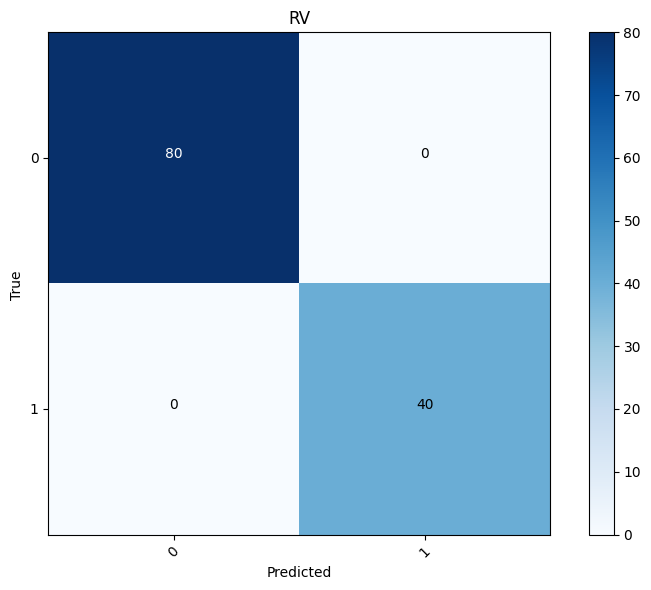

In [154]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix_train, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("RV")
plt.colorbar()
tick_marks = np.arange(len(set(y_train)))
plt.xticks(tick_marks, sorted(set(y_train)), rotation=45)
plt.yticks(tick_marks, sorted(set(y_train)))
plt.xlabel('Predicted')
plt.ylabel('True ')

thresh = conf_matrix_train.max() / 2.
for i, j in np.ndindex(conf_matrix_train.shape):
    plt.text(j, i, format(conf_matrix_train[i, j], 'd'),
             horizontalalignment="center",
             color="white" if conf_matrix_train[i, j] > thresh else "black")
plt.tight_layout()
plt.show()